<a href="https://colab.research.google.com/github/KubraErensoy/BTK-DATASCIENCE/blob/main/ML_Classification_code5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sınıflandırma**

1.   Bilgisayarın kendisine verilen etiketli verilerden öğrenerek, yeni gözlemleri sınıflara ayırmasını sağlayan bir denetimli öğrenme algoritmasıdır.
2. Sınıflandırma Modelleri:

*   **Lojistik Regresyon:**
Lojistik regresyon, bağımlı değişkenin kategorik bir değişken olduğu sınıflandırma işlemi yapan bir regresyon yöntemidir. Amaç bağımlı ve bağımsız değişkenler arasında doğrusal bir model kurmaktır. 

  - Bağımlı değişkenin 2 farklı değer 
alabilmesi durumunda çalışır 
  - Lojistik regresyon, tam olarak 0 veya 1'i tahmin etmek yerine, 0 ile 1 arasında, özel bir olasılık değeri üretir.

*   **K-En Yakın Komşu:**   
 - Birbirine benzer özelliklerin mesafe olarak birbirilerine yakın olduğunu varsayan Denetimli Öğrenme algoritmasıdır.

 - Bir örnek kümesindeki verilerin dağılımından yararlanılarak sınıflandırılmasında kullanılmaktadır.Yeni bir veri noktasının sınıfını tahmin etmek için o noktanın mevcut veri noktalarına uzaklığı hesaplanıp, k sayıda yakın komşuluğuna bakılır.

*   **Destek Vektör Makinesi(SVM):**
SVM, doğrusal veya doğrusal olmayan
sınıflandırma, regresyon ve hatta aykırı değer tespiti yapabilen güçlü ve çok yönlü bir Makine Öğrenimi modelidir.

*   **Karar Ağacı:**Bir karar ağacı, bir dizi olası karar yolunu ve her yol için bir sonucu temsil etmek için bir ağaç yapısı kullanır.Karar ağaclarının yapısı:
 - Root(kök) ,
 - Node(düğüm) ,
 - Leaf(yaprak) oluşur.
*  **Rastgele Orman:** Sınıflandırma işlemi esnasında birden fazla karar ağacı üreterek sınıflandırma değerini yükseltmeyi hedefleyen bir algoritmadır.



```
#ortopedik_hastalarin_biyomekanik_ozellikleri.csv
```





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score

In [10]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


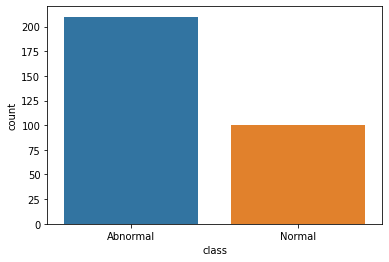

In [12]:
#hangi sınıfların olduğunu görselleştir
sns.countplot(data["class"])#Abnormal ve Normal olmak üzere 2 sınıf vardır.
plt.show()

In [13]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [15]:
y = data["class"].values # sınıfları y değişkeninin içerisine koyalım
x_data = data.drop(["class"],axis=1)


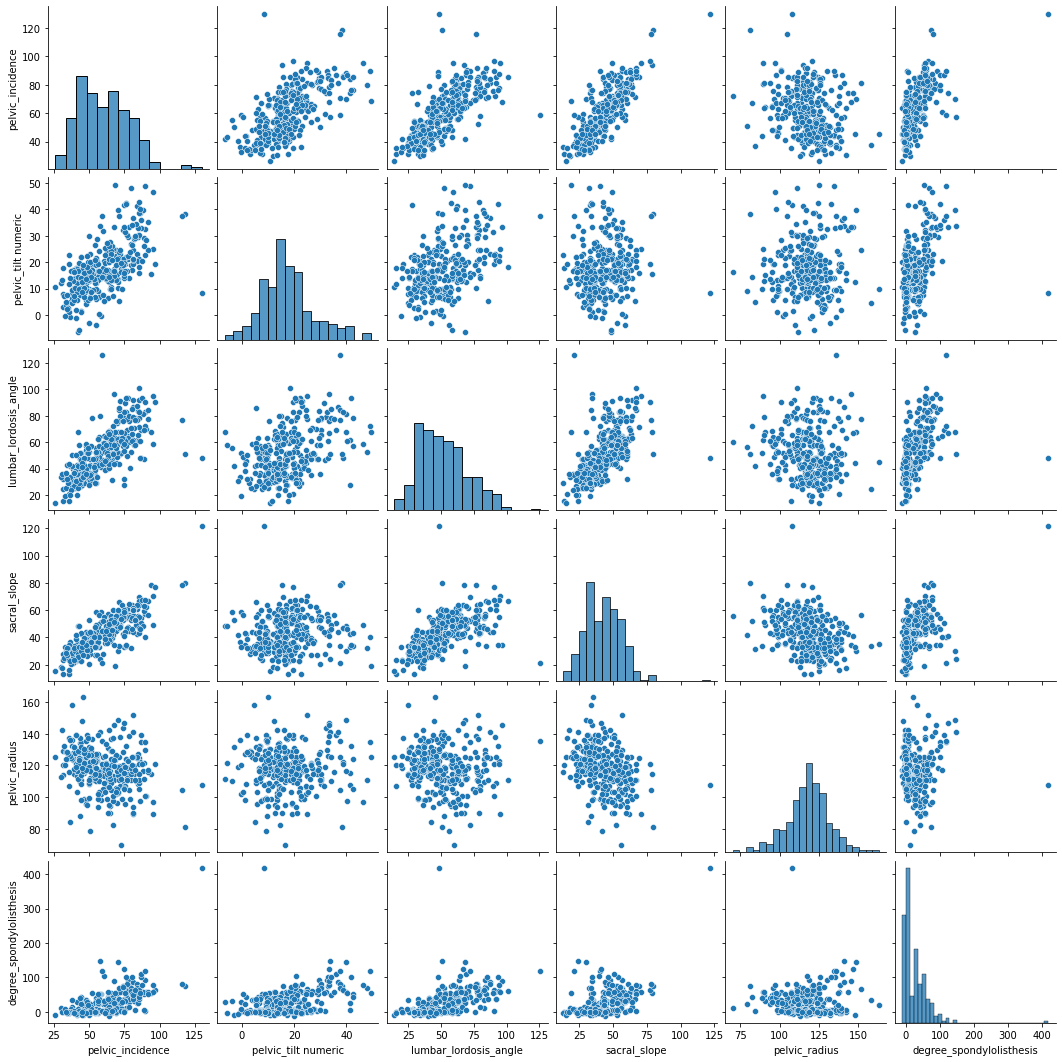

In [16]:
#verinin içerisinde bulunan özelliklerin birbiri ile ilişkisini yorumlamak için keşifsel 
sns.pairplot(x_data)
plt.show()

**Veriyi Normalize Edelim**

In [17]:
#normalizasyon
x =(x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

**Eğitim/Test Bölünmesi**

In [18]:
#eğitim test bölünmesi
from sklearn.model_selection import train_test_split

In [19]:
# %15 test,%85 eğitim
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=42)

#transpoze alıyoruz
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (6, 263)
x_test  (6, 47)
y_train  (263,)
y_test  (47,)


**Sklearn Logistik Regresyon Modeli Eğitimi ve Testi**

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
# eğitim
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)

LogisticRegression()

In [22]:
#test
test_dogrulugu = lr.score(x_test.T,y_test.T)
print("Test Doğruluğu : {}".format(test_dogrulugu))

Test Doğruluğu : 0.7872340425531915


**K-En Yakın Komşu**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [ ]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri.csv")
data.head(3)

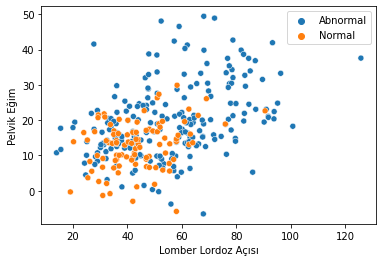

In [9]:
sns.scatterplot(data=data,x = "lumbar_lordosis_angle", y = "pelvic_tilt numeric",hue="class")
plt.xlabel("Lomber Lordoz Açısı")
plt.ylabel("Pelvik Eğim")
plt.legend()
plt.show()

In [10]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [11]:
y = data["class"].values  #sınıfları y değişkeninin içerisine koyalım
x_data = data.drop(["class"], axis =1) # özellikleri x_data değişkeninin içerisine atalım

In [12]:
#normalizasyon
x =(x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [13]:
#eğitim test bölünmesi
from sklearn.model_selection import train_test_split
#%15 test,%85 eğitim
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=1)

**K-En Yakın Komşu Algoritmasının Eğitimi ve Testi**

In [14]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = 4
knn = KNeighborsClassifier(n_neighbors= komsu_sayisi)
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
print("{} En Yakın Komşu Modeli Test Doğruluğu {} ".format(komsu_sayisi,knn.score(x_test,y_test)))

4 En Yakın Komşu Modeli Test Doğruluğu 0.6382978723404256 


**En İyi K Değerinin Bulunması**

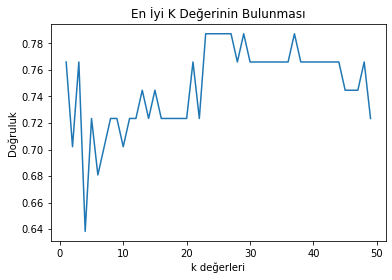

In [15]:
score_list=[]
for each in range (1,50):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,50),score_list)
plt.xlabel("k değerleri")
plt.ylabel("Doğruluk")
plt.title("En İyi K Değerinin Bulunması")
plt.show()



**Destek Vektör Makinası(Support Vector Machines)**

In [16]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri.csv")
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal


In [18]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [19]:
y = data["class"].values  #sınıfları y değişkeninin içerisine koyalım
x_data = data.drop(["class"], axis =1) # özellikleri x_data değişkeninin içerisine atalım

In [20]:
#normalizasyon
x =(x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [21]:
#eğitim test bölünmesi
from sklearn.model_selection import train_test_split
#%15 test,%85 eğitim
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=1)

**Destek Vektor Makinası Algoritmasının Eğitimi ve Testi**

In [22]:
#Destek Vektör Makinası içe aktor
from sklearn.svm import SVC

#Destek Vektör Makinası eğitimi
svm=SVC(random_state=1)
svm.fit(x_train,y_train)

#testi
print("Destek Vektör Makinesi Modeli Test Doğruluk:{}".format(svm.score(x_test,y_test)))

Destek Vektör Makinesi Modeli Test Doğruluk:0.7872340425531915


**Karar Ağacı**

In [23]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri.csv")
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal


In [25]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [26]:
y = data["class"].values  #sınıfları y değişkeninin içerisine koyalım
x_data = data.drop(["class"], axis =1) # özellikleri x_data değişkeninin içerisine atalım

In [27]:
#normalizasyon
x =(x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [28]:
#eğitim test bölünmesi
from sklearn.model_selection import train_test_split
#%15 test,%85 eğitim
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=1)

In [29]:
#Karar Ağacı içe Aktar 
from sklearn.tree import DecisionTreeClassifier

#Karar Ağacı Eğitimi
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Karar Ağacı Modeli Test Doğruluk:{}".format(dt.score(x_test,y_test)))



Karar Ağacı Modeli Test Doğruluk:0.851063829787234


**Rastgele Orman**

In [30]:
import pandas as pd
import numpy as np

In [31]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri.csv")
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal


In [32]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [33]:
y = data["class"].values  #sınıfları y değişkeninin içerisine koyalım
x_data = data.drop(["class"], axis =1) # özellikleri x_data değişkeninin içerisine atalım

In [34]:
#normalizasyon
x =(x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [35]:
#eğitim test bölünmesi
from sklearn.model_selection import train_test_split
#%15 test,%85 eğitim
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=1)

**Rastgele Orman Algoritmasının Eğitimi ve Testi**

In [36]:
# Rastgele Orman içe aktar
from sklearn.ensemble import RandomForestClassifier

#Rastgele Orman Eğitimi
rf=RandomForestClassifier(n_estimators=100,random_state=1)# 100 tane karar ağacı içerir.
rf.fit(x_train,y_train)

print("Rastgele Orman Modeli Test Doğruluk:{}".format(dt.score(x_test,y_test)))


Rastgele Orman Modeli Test Doğruluk:0.851063829787234


  **Sınıflandırma Modellerinin Değerlendirilmesi**

   - **Doğruluk:**bir ölçüm sisteminin doğruluğu,bir niceliğin ölçüm değerinin asıl değerine olan yakınlık derecesidir.
   - **Karışıklık Matrisi:** bir algoritmanın performansının ,tipik olarak denetimli bir öğrenme olanın görselleştirilmesine izin veren özel bir tablo düzenidir.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

In [38]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri.csv")
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


In [39]:
y = data["class"].values  #sınıfları y değişkeninin içerisine koyalım
x_data = data.drop(["class"], axis =1) # özellikleri x_data değişkeninin içerisine atalım

In [40]:
#normalizasyon
x =(x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [41]:
#eğitim test bölünmesi
from sklearn.model_selection import train_test_split
#%15 test,%85 eğitim
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=1)

In [42]:
# Rastgele Orman içe aktar
from sklearn.ensemble import RandomForestClassifier

#Rastgele Orman Eğitimi
rf=RandomForestClassifier(n_estimators=100,random_state=1)# 100 tane karar ağacı içerir.
rf.fit(x_train,y_train)

print("Rastgele Orman Modeli Test Doğruluk:{}".format(dt.score(x_test,y_test)))


Rastgele Orman Modeli Test Doğruluk:0.851063829787234


In [43]:
# %% Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[14,  3],
       [ 3, 27]])

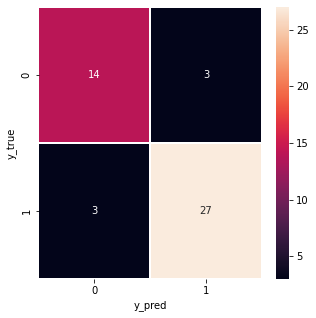

In [44]:
#sıcaklık haritası

f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()